In [ ]:
import numpy as np

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
from urllib.request import urlretrieve
url='https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [ ]:
urlretrieve(url,'df.csv')

('df.csv', <http.client.HTTPMessage at 0x7e26b5961420>)

In [ ]:
med=pd.read_csv('df.csv')

In [ ]:
med

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
med.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


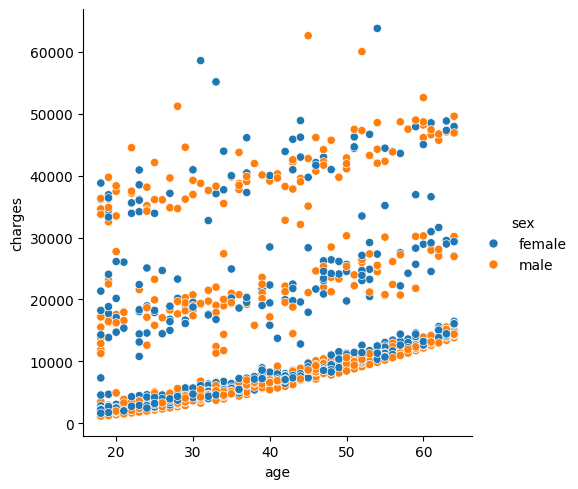

In [ ]:
sns.relplot(data=med,x='age',y='charges',kind='scatter',hue='sex')

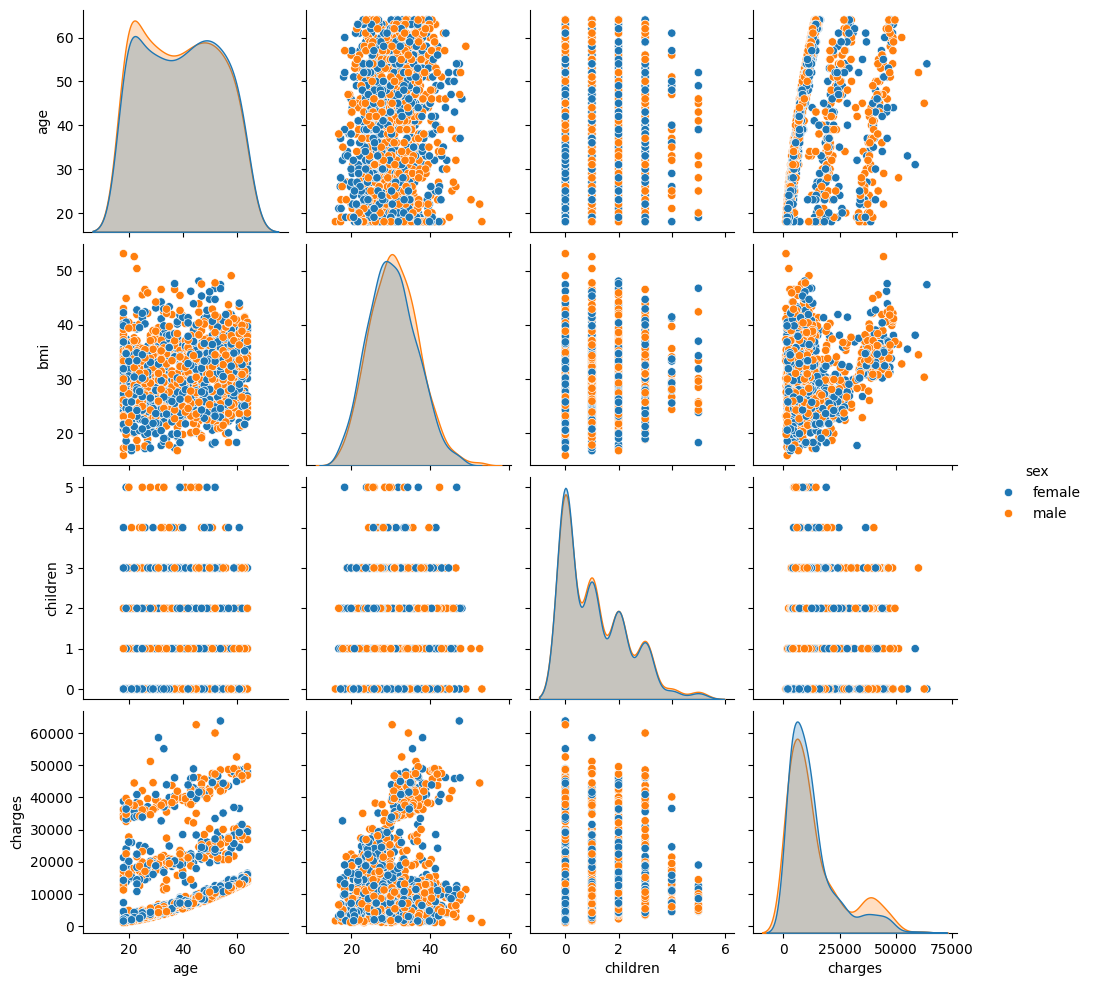

In [ ]:
sns.pairplot(data=med,hue='sex')

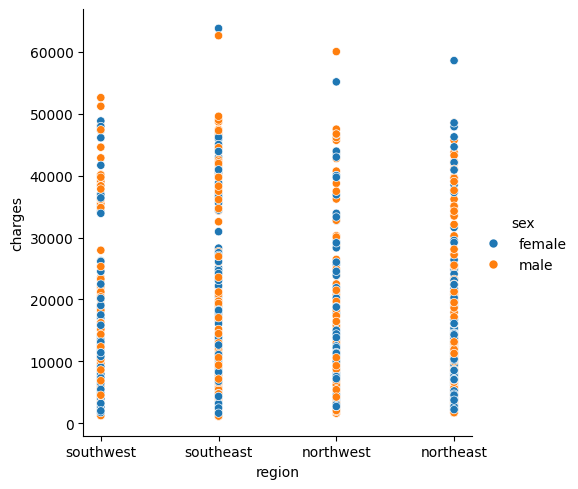

In [ ]:
sns.relplot(data=med,x='region',hue='sex',y='charges',kind='scatter')

<Axes: xlabel='smoker', ylabel='Count'>

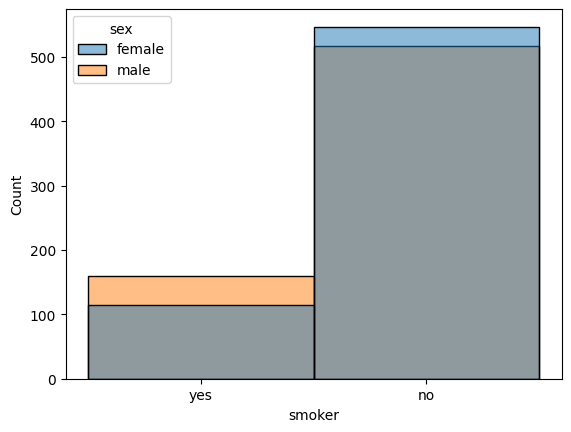

In [ ]:
sns.histplot(data=med,x='smoker',hue='sex')

In [ ]:
med.charges.corr(med.age)

0.2990081933306476

In [ ]:
x={'yes':1,'no':0}
new=med.smoker.map(x)
med.charges.corr(new)

0.787251430498478

In [ ]:
med.corr()

<ipython-input-32-ca3073ed9f3c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  med.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<ipython-input-8-267dd6eca6bc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(med.corr(),cmap='summer',annot=True)


<Axes: >

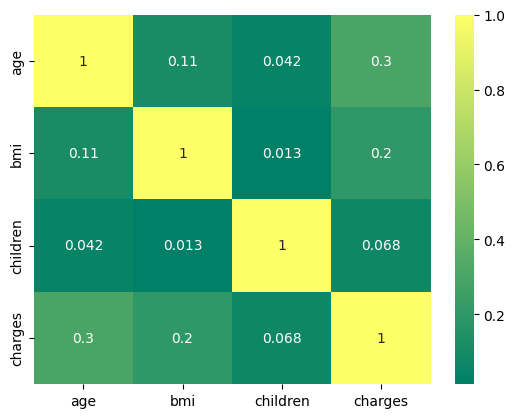

In [ ]:
sns.heatmap(med.corr(),cmap='summer',annot=True)

<Axes: xlabel='age', ylabel='charges'>

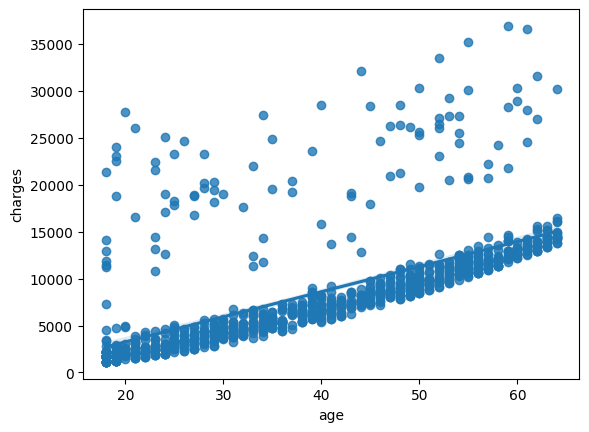

In [ ]:
non=med[med.smoker=='no']
non
sns.regplot(data=non,x='age',y='charges')

In [ ]:
def check(age,w,b):
  return age*w+b

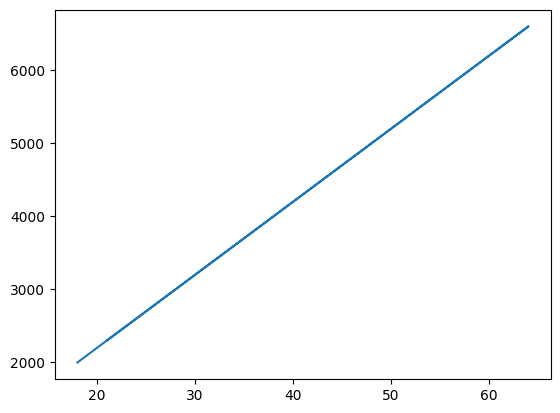

In [ ]:
x=non.age
w=100
b=200
y=check(x,w,b)
plt.plot(x,y)
#sns.relplot(data=non,x=x,y=y,kind='line')

In [ ]:
def actual(w,b):
  x=non.age
  y=non.charges
  z=check(x,w,b)
  plt.plot(x,z,'r-.')
  sns.scatterplot(data=non,x=x,y=y)

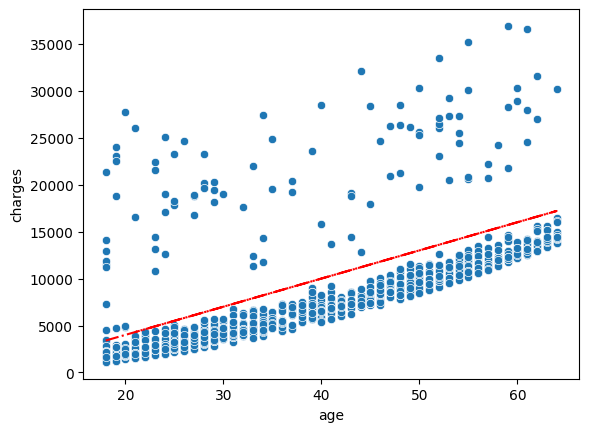

In [ ]:
actual(300,-2000)

In [ ]:
def error(targets,predictions):
  return np.sqrt(np.mean(np.square(targets-predictions)))

In [ ]:
targets=non.charges
predictions=check(non.age,300,-2000)
z=error(targets,predictions)
z

4884.627957453161

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
input=non[['age']]
target=non.charges
model.fit(input,target)

LinearRegression()

In [ ]:
model.predict(np.array([[23],[61],[55]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 4055.30443855, 14210.76312614, 12607.26964915])

In [ ]:
error(target,model.predict(input))

4662.505766636395

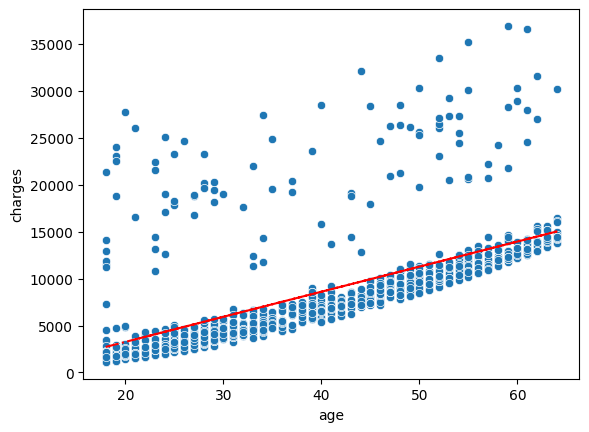

In [ ]:
w=model.coef_
b=model.intercept_
actual(w,b)

In [ ]:
smoke=med[med.smoker=='yes']
smoke

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [ ]:
X=smoke[['age']]
y=smoke.charges
model.fit(X,y)


LinearRegression()

In [ ]:
model.predict(np.array([[23],[45],[61]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([27314.59297544, 34029.82022186, 38913.62185562])

In [ ]:
error(y,model.predict(X))

10711.00334810241

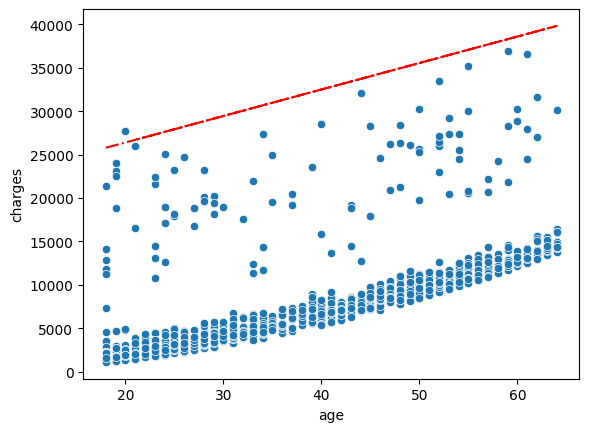

In [ ]:
actual(model.coef_,model.intercept_)

In [ ]:
X=non[['age','bmi','children']]
Y=non.charges
model.fit(X,Y)

LinearRegression()

In [ ]:
predict=model.predict(non[['age','bmi','children']])
error(Y,predict)

4608.470405038247

In [ ]:
#actual(model.coef_,model.intercept_)


In [ ]:
X=med[['age','bmi','children']]
Y=med.charges
model.fit(X,Y)

LinearRegression()

In [ ]:
error(Y,model.predict(med[['age','bmi','children']]))

11355.317901125973

In [ ]:
nsmoke={'yes':1,'no':0}
med['smcode']=med.smoker.map(nsmoke)
med.smcode

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smcode, Length: 1338, dtype: int64

In [ ]:
nsex={'male':1,'female':0}
med['nsex']=med.sex.map(nsex)
med.nsex

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: nsex, Length: 1338, dtype: int64

In [ ]:
X=med[['age','bmi','children','smcode','nsex']]
Y=med.charges
model.fit(X,Y)

LinearRegression()

In [ ]:
error(Y,model.predict(X))

6056.100708754546

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
enc.fit(med[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
ok=enc.transform(med[['region']]).toarray()

In [ ]:
med[['northeast', 'northwest', 'southeast', 'southwest']]=ok
med

,age,sex,bmi,children,smoker,region,charges,smcode,nsex,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [ ]:
X=med[['age','bmi','children','smcode','nsex','northeast', 'northwest', 'southeast', 'southwest']]
Y=med.charges
model.fit(X,Y)

LinearRegression()

In [ ]:
model.predict(X)

array([25293.7130284 ,  3448.60283431,  6706.9884907 , ...,
        4149.13248568,  1246.58493898, 37085.62326757])

In [ ]:
error(Y,model.predict(X))

6041.6796511744515

In [ ]:
nsex={'male':1,'female':0}
non['nsex']=non.sex.map(nsex)
enc.fit(non[['region']])
non[['northeast', 'northwest', 'southeast', 'southwest']]=enc.transform(non[['region']]).toarray()
X=non[['age','bmi','children','nsex','northeast', 'northwest', 'southeast', 'southwest']]
Y=non.charges
model.fit(X,Y)

<ipython-input-71-772270e500ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non['nsex']=non.sex.map(nsex)
<ipython-input-71-772270e500ae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non[['northeast', 'northwest', 'southeast', 'southwest']]=enc.transform(non[['region']]).toarray()


LinearRegression()

In [ ]:
error(Y,model.predict(X))

4573.074988795492

In [ ]:
from sklearn.preprocessing import StandardScaler
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(med[numeric_cols])

StandardScaler()

In [ ]:
print(scaler.mean_)
print(scaler.var_)

[39.20702541 30.66339686  1.09491779]
[197.25385199  37.16008997   1.45212664]


In [ ]:
scaled_inputs = scaler.transform(med[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [ ]:
cat_cols = ['smcode', 'nsex', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = med[cat_cols].values

In [ ]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = med.charges
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = error(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515
